# Fairness Evaluation

## Basic Information

Person or organization developing model: 
*   Abdulrahman Alsadun (abdulrahman.alsadun@gwu.edu), Chao Zhang (chao.zhang@gwu.edu), Elena Huang (mengzhe_huang@gwu.edu), Jenny Yazlovsky (jyazlovsky@gwu.edu), Jinni Yang (jinni.yang@gwu.edu), Maximilian Smith-Uchida (msmithuchida814@gwu.edu)


This notebook includes evaluation of the results of each model for fairness risks using:
*   The SolasAI Disparity and Bias Testing Library
*   Calculation of Statistical Parity Difference and Disparate Impact Ratio



Models and Performance Evaluation notebook: [SAI_Models](https://colab.research.google.com/drive/1GlgHP3bdogdm8Ls3IEXIVx--vR1H6VQD?usp=sharing)

## Step 0: Install and config

In [ ]:
# mount g-drive with training data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd /content/gdrive/Shareddrives/SolasPracSpr23/

Mounted at /content/gdrive
/content/gdrive/Shareddrives/SolasPracSpr23


In [ ]:
# install versioned dependencies for best reproducibility
! pip install scikit-learn==1.2.2
! pip install pandas==1.4.4
! pip install numpy==1.22.4
! pip install solas-ai==0.2.4 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 1.4.4 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# general utilties
import math
import pandas as pd 
import sklearn
from sklearn import metrics
import numpy as np

# bias testing 
import solas_disparity as sd

In [ ]:
# run updated dataset with model results from SAI_Models.ipynb
train = pd.read_csv("train_predicted.csv")
valid = pd.read_csv("valid_predicted.csv")
test = pd.read_csv("test_predicted.csv")

## Step 1: SAI - AIR

In [ ]:
# define demogrpahic groups
reused_arguments = dict(
    group_data=test,
    protected_groups=["Minority", "Age >= 62","Female"],
    reference_groups=["Majority", "Age < 62","Male"],
    group_categories=["Race",  "Age","Gender"],
    sample_weight=None,
)

In [ ]:
# create an empty dictionary to store air results
air = {}

# create a list with column name for model predictions
models = ['EBM Offer','LR Offer','XGB Offer','NN Offer']

# for loop to iterate 4 model predictions
for i in models:
  data = test[i]
  index = i.split()[0] # this will takeaway the string 'Offer' 
  air[index] = sd.adverse_impact_ratio(outcome=data,
                                air_threshold=0.9, 
                                percent_difference_threshold=0,
                                **reused_arguments,)

In [ ]:
# air result of EBM model 
air['EBM']

## Disparity Calculation: Adverse Impact Ratio

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## Adverse Impact Ratio Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,"10,000",0.00%,"3,005.0","1,221.0",40.63%,24.76%,0.621,0.000,Yes,743.956397
Race,Majority,,"10,000",0.00%,"6,995.0","4,574.0",65.39%,,,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0","2,719.0",57.97%,-0.43%,1.008,0.685,No,
Age,Age < 62,,"9,483",5.17%,"4,793.0","2,758.0",57.54%,,,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0","2,565.0",51.39%,13.09%,0.797,0.000,Yes,653.392893
Gender,Male,,"10,000",0.00%,"5,009.0","3,230.0",64.48%,,,,,


In [ ]:
# air result of LR model 
air['LR']

## Disparity Calculation: Adverse Impact Ratio

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## Adverse Impact Ratio Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,"10,000",0.00%,"3,005.0","1,354.0",45.06%,19.73%,0.695,0.000,Yes,592.913510
Race,Majority,,"10,000",0.00%,"6,995.0","4,532.0",64.79%,,,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0","2,765.0",58.96%,-0.41%,1.007,0.699,No,
Age,Age < 62,,"9,483",5.17%,"4,793.0","2,806.0",58.54%,,,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0","2,674.0",53.58%,10.55%,0.836,0.000,Yes,526.457576
Gender,Male,,"10,000",0.00%,"5,009.0","3,212.0",64.12%,,,,,


In [ ]:
# air result of XGB model 
air['XGB']

## Disparity Calculation: Adverse Impact Ratio

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## Adverse Impact Ratio Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,"10,000",0.00%,"3,005.0","1,224.0",40.73%,24.40%,0.625,0.000,Yes,733.223731
Race,Majority,,"10,000",0.00%,"6,995.0","4,556.0",65.13%,,,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0","2,715.0",57.89%,-0.60%,1.010,0.570,No,
Age,Age < 62,,"9,483",5.17%,"4,793.0","2,746.0",57.29%,,,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0","2,522.0",50.53%,14.51%,0.777,0.000,Yes,724.292274
Gender,Male,,"10,000",0.00%,"5,009.0","3,258.0",65.04%,,,,,


In [ ]:
# air result of NN model 
air['NN']

## Disparity Calculation: Adverse Impact Ratio

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority                                                      │
│ Affected Reference                              │ Majority                                                      │
│ Affected Categories                             │ Race                                                          │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## Adverse Impact Ratio Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,"10,000",0.00%,"3,005.0","1,477.0",49.15%,17.15%,0.741,0.000,Yes,515.450322
Race,Majority,,"10,000",0.00%,"6,995.0","4,638.0",66.30%,,,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0","2,857.0",60.92%,0.21%,0.996,0.847,No,
Age,Age < 62,,"9,483",5.17%,"4,793.0","2,930.0",61.13%,,,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0","2,982.0",59.75%,2.80%,0.955,0.004,No,
Gender,Male,,"10,000",0.00%,"5,009.0","3,133.0",62.55%,,,,,


## Step 2: SAI - By-quantile AIR

In [ ]:
# create an empty dictionary to store air results
airq = {}

# create a list with column name for model predictions
models = ['EBM Prediction','LR Prediction','XGB Prediction','NN Prediction']

# for loop to iterate 4 model predictions
for i in models:
  data = test[i]
  index = i.split()[0]
  airq[index] = sd.adverse_impact_ratio_by_quantile(
                    outcome=data,
                    air_threshold=0.9,
                    percent_difference_threshold=0.0,
                    quantiles=[decile / 10 for decile in range(1, 11)],
                    lower_score_favorable=True,
                    **reused_arguments,)

In [ ]:
# by-quantile air result of EBM model
airq['EBM']

## Disparity Calculation: AIR by Quantile

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

## AIR by Quantile Summary Table

Group Category,Group,Reference Group,Quantile,Quantile Cutoff,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,10.0%,0.233545,"10,000",0.00%,"3,005.0",10.0,0.33%,13.82%,0.024,0.000,Yes,415.296640
Race,Majority,,10.0%,0.233545,"10,000",0.00%,"6,995.0",990.0,14.15%,,,,,
Age,Age >= 62,Age < 62,10.0%,0.233545,"9,483",5.17%,"4,690.0",468.0,9.98%,-0.05%,1.005,0.966,No,
Age,Age < 62,,10.0%,0.233545,"9,483",5.17%,"4,793.0",476.0,9.93%,,,,,
Gender,Female,Male,10.0%,0.233545,"10,000",0.00%,"4,991.0",292.0,5.85%,8.28%,0.414,0.000,Yes,413.455780
Gender,Male,,10.0%,0.233545,"10,000",0.00%,"5,009.0",708.0,14.13%,,,,,
Race,Minority,Majority,20.0%,0.293793,"10,000",0.00%,"3,005.0",66.0,2.20%,25.45%,0.079,0.000,Yes,764.832023
Race,Majority,,20.0%,0.293793,"10,000",0.00%,"6,995.0","1,934.0",27.65%,,,,,
Age,Age >= 62,Age < 62,20.0%,0.293793,"9,483",5.17%,"4,690.0",929.0,19.81%,0.10%,0.995,0.927,No,
Age,Age < 62,,20.0%,0.293793,"9,483",5.17%,"4,793.0",954.0,19.90%,,,,,


In [ ]:
# by-quantile air result of LR model
airq['LR']

## Disparity Calculation: AIR by Quantile

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

## AIR by Quantile Summary Table

Group Category,Group,Reference Group,Quantile,Quantile Cutoff,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,10.0%,0.261481,"10,000",0.00%,"3,005.0",28.0,0.93%,12.96%,0.067,0.000,Yes,389.563974
Race,Majority,,10.0%,0.261481,"10,000",0.00%,"6,995.0",972.0,13.90%,,,,,
Age,Age >= 62,Age < 62,10.0%,0.261481,"9,483",5.17%,"4,690.0",461.0,9.83%,0.37%,0.963,0.568,No,
Age,Age < 62,,10.0%,0.261481,"9,483",5.17%,"4,793.0",489.0,10.20%,,,,,
Gender,Female,Male,10.0%,0.261481,"10,000",0.00%,"4,991.0",354.0,7.09%,5.80%,0.550,0.000,Yes,289.678579
Gender,Male,,10.0%,0.261481,"10,000",0.00%,"5,009.0",646.0,12.90%,,,,,
Race,Minority,Majority,20.0%,0.323941,"10,000",0.00%,"3,005.0",101.0,3.36%,23.79%,0.124,0.000,Yes,714.796283
Race,Majority,,20.0%,0.323941,"10,000",0.00%,"6,995.0","1,899.0",27.15%,,,,,
Age,Age >= 62,Age < 62,20.0%,0.323941,"9,483",5.17%,"4,690.0",940.0,20.04%,-0.37%,1.019,0.672,No,
Age,Age < 62,,20.0%,0.323941,"9,483",5.17%,"4,793.0",943.0,19.67%,,,,,


In [ ]:
# by-quantile air result of XGB model
airq['XGB']

## Disparity Calculation: AIR by Quantile

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

## AIR by Quantile Summary Table

Group Category,Group,Reference Group,Quantile,Quantile Cutoff,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,10.0%,0.226702,"10,000",0.00%,"3,005.0",22.0,0.73%,13.25%,0.052,0.000,Yes,398.141530
Race,Majority,,10.0%,0.226702,"10,000",0.00%,"6,995.0",978.0,13.98%,,,,,
Age,Age >= 62,Age < 62,10.0%,0.226702,"9,483",5.17%,"4,690.0",467.0,9.96%,0.02%,0.998,1.000,No,
Age,Age < 62,,10.0%,0.226702,"9,483",5.17%,"4,793.0",478.0,9.97%,,,,,
Gender,Female,Male,10.0%,0.226702,"10,000",0.00%,"4,991.0",286.0,5.73%,8.52%,0.402,0.000,Yes,425.434218
Gender,Male,,10.0%,0.226702,"10,000",0.00%,"5,009.0",714.0,14.25%,,,,,
Race,Minority,Majority,20.0%,0.292837,"10,000",0.00%,"3,005.0",85.0,2.83%,24.55%,0.103,0.000,Yes,737.669764
Race,Majority,,20.0%,0.292837,"10,000",0.00%,"6,995.0","1,915.0",27.38%,,,,,
Age,Age >= 62,Age < 62,20.0%,0.292837,"9,483",5.17%,"4,690.0",928.0,19.79%,0.14%,0.993,0.886,No,
Age,Age < 62,,20.0%,0.292837,"9,483",5.17%,"4,793.0",955.0,19.92%,,,,,


In [ ]:
# by-quantile air result of NN model
airq['NN']

## Disparity Calculation: AIR by Quantile

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ AIR Threshold                                   │ 0.9                                                           │
│ % Diff Threshold                                │ 0.0                                                           │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

## AIR by Quantile Summary Table

Group Category,Group,Reference Group,Quantile,Quantile Cutoff,Observations,Percent Missing,Total,Favorable,Percent Favorable,Percent Difference Favorable,AIR,P-Values,Practically Significant,Shortfall
Race,Minority,Majority,10.0%,0.304678,"10,000",0.00%,"3,005.0",9.0,0.30%,13.87%,0.021,0.000,Yes,416.726233
Race,Majority,,10.0%,0.304678,"10,000",0.00%,"6,995.0",991.0,14.17%,,,,,
Age,Age >= 62,Age < 62,10.0%,0.304678,"9,483",5.17%,"4,690.0",463.0,9.87%,0.33%,0.968,0.616,No,
Age,Age < 62,,10.0%,0.304678,"9,483",5.17%,"4,793.0",489.0,10.20%,,,,,
Gender,Female,Male,10.0%,0.304678,"10,000",0.00%,"4,991.0",441.0,8.84%,2.32%,0.792,0.000,Yes,115.991216
Gender,Male,,10.0%,0.304678,"10,000",0.00%,"5,009.0",559.0,11.16%,,,,,
Race,Minority,Majority,20.0%,0.338136,"10,000",0.00%,"3,005.0",50.0,1.66%,26.21%,0.060,0.000,Yes,787.705504
Race,Majority,,20.0%,0.338136,"10,000",0.00%,"6,995.0","1,950.0",27.88%,,,,,
Age,Age >= 62,Age < 62,20.0%,0.338136,"9,483",5.17%,"4,690.0",943.0,20.11%,-0.41%,1.021,0.634,No,
Age,Age < 62,,20.0%,0.338136,"9,483",5.17%,"4,793.0",944.0,19.70%,,,,,


## Step 3: SAI - Standardized Mean Difference

In [ ]:
# create an empty dictionary to store air results
smd = {}

# create a list with column name for model predictions
models = ['EBM Prediction','LR Prediction','XGB Prediction','NN Prediction']

# for loop to iterate 4 model predictions
for i in models:
  data = test[i]
  index = i.split()[0]
  smd[index] = sd.standardized_mean_difference(
                      outcome=data,
                      label=test['Denied'],
                      smd_threshold=30,
                      lower_score_favorable=True,
                      **reused_arguments,)

In [ ]:
# smd result of EBM model
smd['EBM']

## Disparity Calculation: SMD

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ SMD Threshold                                   │ 30.0                                                          │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## SMD Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Average Label,Average Outcome,Std. Dev. of Outcomes,SMD,P-Values,Practically Significant
Race,Minority,Majority,"10,000",0.00%,"3,005.0",0.60,0.58,0.21,60.203,0.000,Yes
Race,Majority,,"10,000",0.00%,"6,995.0",0.45,0.45,0.21,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0",0.49,0.49,0.21,-0.565,0.783,No
Age,Age < 62,,"9,483",5.17%,"4,793.0",0.50,0.49,0.21,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0",0.54,0.53,0.21,35.163,0.000,Yes
Gender,Male,,"10,000",0.00%,"5,009.0",0.46,0.45,0.21,,,


In [ ]:
# smd result of LR model
smd['LR']

## Disparity Calculation: SMD

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ SMD Threshold                                   │ 30.0                                                          │
│ Affected Groups                                 │ Minority                                                      │
│ Affected Reference                              │ Majority                                                      │
│ Affected Categories                             │ Race                                                          │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## SMD Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Average Label,Average Outcome,Std. Dev. of Outcomes,SMD,P-Values,Practically Significant
Race,Minority,Majority,"10,000",0.00%,"3,005.0",0.60,0.56,0.19,53.577,0.000,Yes
Race,Majority,,"10,000",0.00%,"6,995.0",0.45,0.46,0.19,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0",0.49,0.49,0.19,-0.081,0.969,No
Age,Age < 62,,"9,483",5.17%,"4,793.0",0.50,0.49,0.19,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0",0.54,0.51,0.19,23.173,0.000,No
Gender,Male,,"10,000",0.00%,"5,009.0",0.46,0.47,0.19,,,


In [ ]:
# smd result of XGB model
smd['XGB']

## Disparity Calculation: SMD

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ SMD Threshold                                   │ 30.0                                                          │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## SMD Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Average Label,Average Outcome,Std. Dev. of Outcomes,SMD,P-Values,Practically Significant
Race,Minority,Majority,"10,000",0.00%,"3,005.0",0.60,0.58,0.22,58.017,0.000,Yes
Race,Majority,,"10,000",0.00%,"6,995.0",0.45,0.45,0.22,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0",0.49,0.49,0.22,-0.449,0.827,No
Age,Age < 62,,"9,483",5.17%,"4,793.0",0.50,0.49,0.22,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0",0.54,0.53,0.22,34.557,0.000,Yes
Gender,Male,,"10,000",0.00%,"5,009.0",0.46,0.45,0.22,,,


In [ ]:
# smd result of NN model
smd['NN']

## Disparity Calculation: SMD

┌─────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────┐
│ Protected Groups                                │ Minority, Age >= 62, Female                                   │
│ Reference Groups                                │ Majority, Age < 62, Male                                      │
│ Group Categories                                │ Race, Age, Gender                                             │
│ SMD Threshold                                   │ 30.0                                                          │
│ Affected Groups                                 │ Minority, Female                                              │
│ Affected Reference                              │ Majority, Male                                                │
│ Affected Categories                             │ Race, Gender                                                  │
└─────────────────────────────────────────────────┴───────────────────────────────────────────────────────────────┘

\* Percent Missing: Age: 5.17%, Gender: 0.00%, Race: 0.00%

## SMD Summary Table

Group Category,Group,Reference Group,Observations,Percent Missing,Total,Average Label,Average Outcome,Std. Dev. of Outcomes,SMD,P-Values,Practically Significant
Race,Minority,Majority,"10,000",0.00%,"3,005.0",0.60,0.58,0.21,54.408,0.000,Yes
Race,Majority,,"10,000",0.00%,"6,995.0",0.45,0.46,0.21,,,
Age,Age >= 62,Age < 62,"9,483",5.17%,"4,690.0",0.49,0.50,0.21,-0.754,0.714,No
Age,Age < 62,,"9,483",5.17%,"4,793.0",0.50,0.50,0.21,,,
Gender,Female,Male,"10,000",0.00%,"4,991.0",0.54,0.53,0.21,34.160,0.000,Yes
Gender,Male,,"10,000",0.00%,"5,009.0",0.46,0.46,0.21,,,


## Step 4: Statistical Parity Difference and Disparate Impact

- Statustucal Parity Difference formula used: 
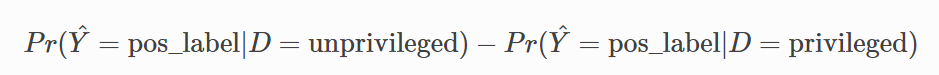
  reference: https://aif360.readthedocs.io/en/latest/modules/generated/aif360.sklearn.metrics.statistical_parity_difference.html 
- Disparate Impact Ratio formula used:
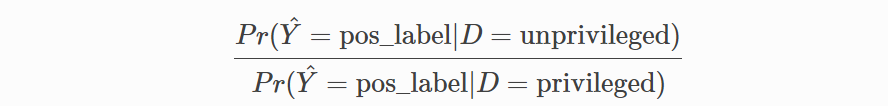
  reference: https://aif360.readthedocs.io/en/latest/modules/generated/aif360.sklearn.metrics.disparate_impact_ratio.html 

In [ ]:
# create function that produces table of Disparate Impact and Statistical Parity Difference
  # protected: input one of the protected group attributes ('Minority', 'Age >= 62', 'Female')
  # reference: input one of the referenced group attributes ('Majority', 'Age < 62', 'Male')
def fairness_table(protected, reference):

  pred_list = ['EBM Offer', 'LR Offer', 'XGB Offer', 'NN Offer']
  table = pd.DataFrame(columns=['Disparate Impact', 'Statistical Parity Difference'], index = ['EBM','LR','XGB','NN'])

  for i in pred_list:
      dis_un = test['Denied'].loc[(test[i]==1) & (test[protected]==1)].count() / test['Denied'].loc[(test[protected]==1)].count()
      dis_pr = test['Denied'].loc[(test[i]==1) & (test[reference]==1)].count() / test['Denied'].loc[(test[reference]==1)].count()
      dis_imp = dis_un / dis_pr
      spd = dis_pr - dis_un
      index = i.split()[0]
      table.loc[index,'Disparate Impact'] = dis_imp
      table.loc[index,'Statistical Parity Difference'] = spd

  return table

In [ ]:
# table with demographic attribute 'Race'
fairness_table('Minority','Majority')

,Disparate Impact,Statistical Parity Difference
EBM,0.621388,0.247573
LR,0.69546,0.197309
XGB,0.633276,0.239537
NN,0.597471,0.25671


In [ ]:
# table with demographic attribute 'Age'
fairness_table('Age >= 62','Age < 62')

,Disparate Impact,Statistical Parity Difference
EBM,1.00751,-0.004322
LR,1.007029,-0.004115
XGB,1.010425,-0.005972
NN,0.9965,0.00214


In [ ]:
# table with demographic attribute 'Gender'
fairness_table('Female','Male')

,Disparate Impact,Statistical Parity Difference
EBM,0.796982,0.130914
LR,0.835506,0.105481
XGB,0.792809,0.134308
NN,0.77797,0.139982
